In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, f1_score, precision_recall_fscore_support, classification_report, confusion_matrix, accuracy_score, mean_squared_error

In [2]:
df = pd.read_csv('../data/processed_attrition_data.csv')

X = df.drop(columns=['Attrition_Risk_Level'])
y = df['Attrition_Risk_Level']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Siap! Silakan lanjut ke blok eksperimen.")

✅ Data Siap! Silakan lanjut ke blok eksperimen.


In [4]:
list_lr = [0.04, 0.08, 0.06, 0.05, 0.009, 0.2, 0.6, 0.012, 0.01, 0.015, 0.018, 0.0111]

# 🧪 Eksperimen No. 1
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.04` (Index List: [0])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.04
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.68436211
Validation score: 0.937143
Iteration 2, loss = 0.11140181
Validation score: 0.960000
Iteration 3, loss = 0.05391944
Validation score: 0.974286
Iteration 4, loss = 0.05927000
Validation score: 0.981905
Iteration 5, loss = 0.03656095
Validation score: 0.974286
Iteration 6, loss = 0.03709674
Validation score: 0.984762
Iteration 7, loss = 0.04766874
Validation score: 0.973333
Iteration 8, loss = 0.04091932
Validation score: 0.984762
Iteration 9, loss = 0.03209721
Validation score: 0.992381
Iteration 10, loss = 0.03119224
Validation score: 0.977143
Iteration 11, loss = 0.03152860
Validation score: 0.984762
Iteration 12, loss = 0.03524132
Validation score: 0.992381
Iteration 13, loss = 0.04240699
Validation score: 0.988571
Iteration 14, loss = 0.03050110
Validation score: 0.990476
Iteration

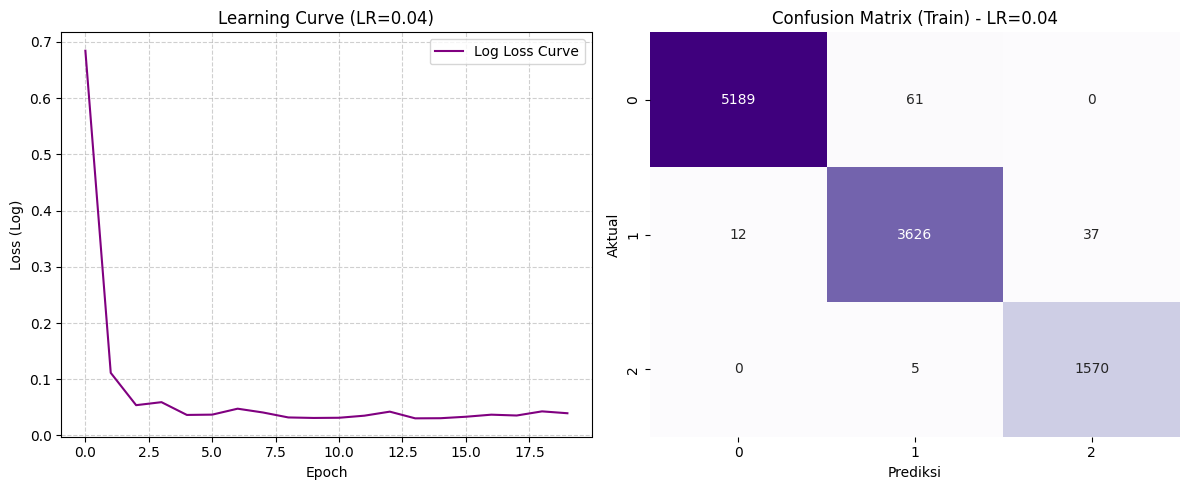


📊 HASIL AKHIR (LR=0.04):
1. Epoch Terakhir  : 20
2. Train Loss (MSE): 0.01095
3. Train Acc       : 0.9890
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5250
           1       0.98      0.99      0.98      3675
           2       0.98      1.00      0.99      1575

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [5]:
LR = list_lr[0]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 2
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.08` (Index List: [1])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.08
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.69149837
Validation score: 0.914286
Iteration 2, loss = 0.11795702
Validation score: 0.960952
Iteration 3, loss = 0.06532091
Validation score: 0.970476
Iteration 4, loss = 0.06919345
Validation score: 0.989524
Iteration 5, loss = 0.05275038
Validation score: 0.961905
Iteration 6, loss = 0.04448649
Validation score: 0.988571
Iteration 7, loss = 0.05192035
Validation score: 0.985714
Iteration 8, loss = 0.04193008
Validation score: 0.978095
Iteration 9, loss = 0.04123576
Validation score: 0.980952
Iteration 10, loss = 0.03621548
Validation score: 0.974286
Iteration 11, loss = 0.04732537
Validation score: 0.976190
Iteration 12, loss = 0.04023104
Validation score: 0.983810
Iteration 13, loss = 0.04026407
Validation score: 0.973333
Iteration 14, loss = 0.04170620
Validation score: 0.988571
Iteration

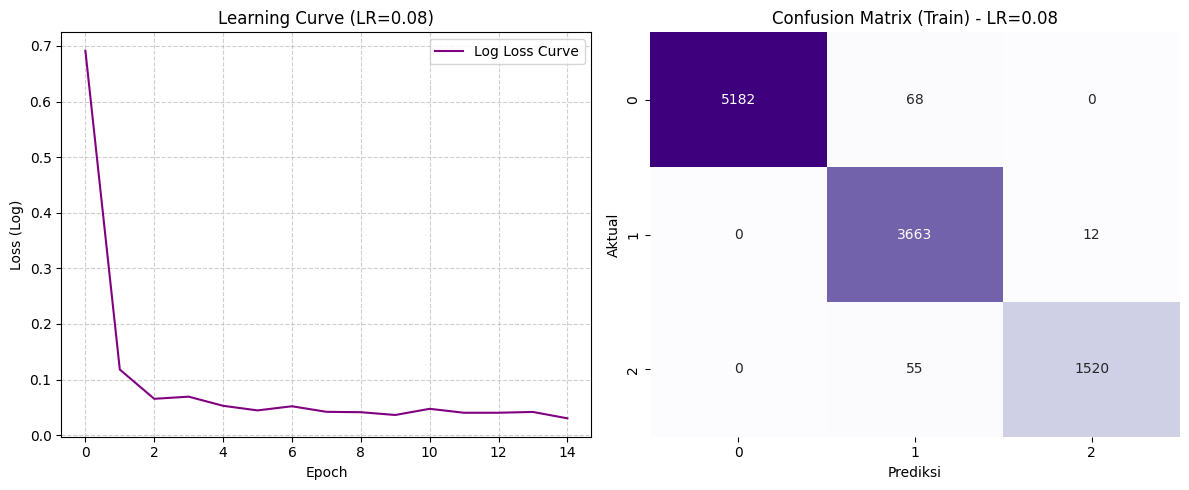


📊 HASIL AKHIR (LR=0.08):
1. Epoch Terakhir  : 15
2. Train Loss (MSE): 0.01286
3. Train Acc       : 0.9871
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5250
           1       0.97      1.00      0.98      3675
           2       0.99      0.97      0.98      1575

    accuracy                           0.99     10500
   macro avg       0.99      0.98      0.98     10500
weighted avg       0.99      0.99      0.99     10500



In [6]:
LR = list_lr[1]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 3
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.06` (Index List: [2])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.06
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.66206354
Validation score: 0.810476
Iteration 2, loss = 0.11143154
Validation score: 0.960000
Iteration 3, loss = 0.05516950
Validation score: 0.980952
Iteration 4, loss = 0.05990634
Validation score: 0.985714
Iteration 5, loss = 0.04528124
Validation score: 0.974286
Iteration 6, loss = 0.04012875
Validation score: 0.987619
Iteration 7, loss = 0.05488134
Validation score: 0.978095
Iteration 8, loss = 0.03820243
Validation score: 0.982857
Iteration 9, loss = 0.04081517
Validation score: 0.994286
Iteration 10, loss = 0.03052950
Validation score: 0.982857
Iteration 11, loss = 0.03051709
Validation score: 0.985714
Iteration 12, loss = 0.03753126
Validation score: 0.988571
Iteration 13, loss = 0.03876630
Validation score: 0.986667
Iteration 14, loss = 0.03881711
Validation score: 0.982857
Iteration

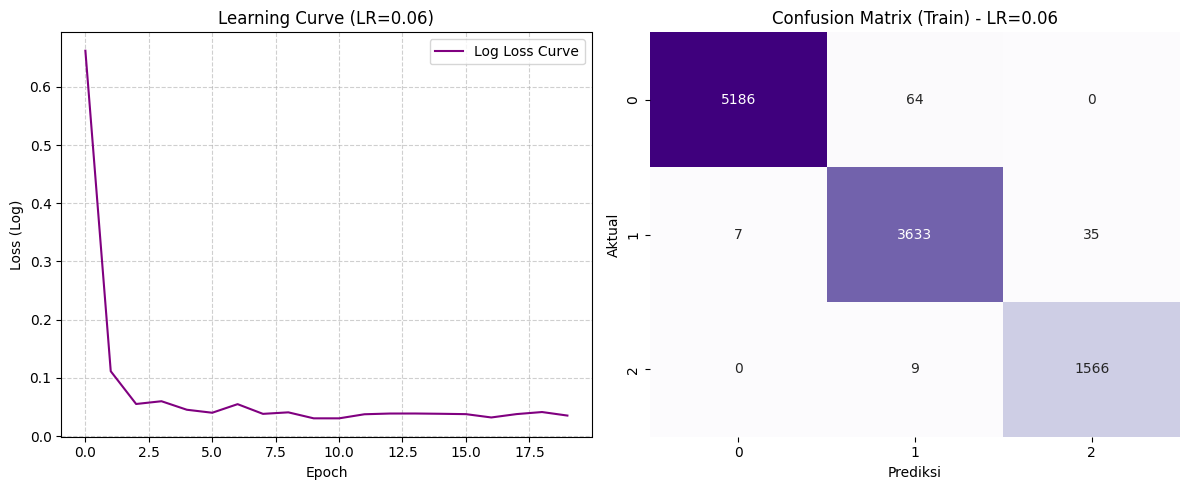


📊 HASIL AKHIR (LR=0.06):
1. Epoch Terakhir  : 20
2. Train Loss (MSE): 0.01095
3. Train Acc       : 0.9890
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5250
           1       0.98      0.99      0.98      3675
           2       0.98      0.99      0.99      1575

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [7]:
LR = list_lr[2]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 4
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.005` (Index List: [3])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.05
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.65115362
Validation score: 0.916190
Iteration 2, loss = 0.11268861
Validation score: 0.980000
Iteration 3, loss = 0.06165510
Validation score: 0.980000
Iteration 4, loss = 0.07796991
Validation score: 0.982857
Iteration 5, loss = 0.04027940
Validation score: 0.976190
Iteration 6, loss = 0.04442826
Validation score: 0.973333
Iteration 7, loss = 0.06395042
Validation score: 0.993333
Iteration 8, loss = 0.03163001
Validation score: 0.989524
Iteration 9, loss = 0.03762683
Validation score: 0.992381
Iteration 10, loss = 0.02979325
Validation score: 0.982857
Iteration 11, loss = 0.03397355
Validation score: 0.982857
Iteration 12, loss = 0.03986320
Validation score: 0.986667
Iteration 13, loss = 0.03531921
Validation score: 0.989524
Iteration 14, loss = 0.03067000
Validation score: 0.983810
Iteration

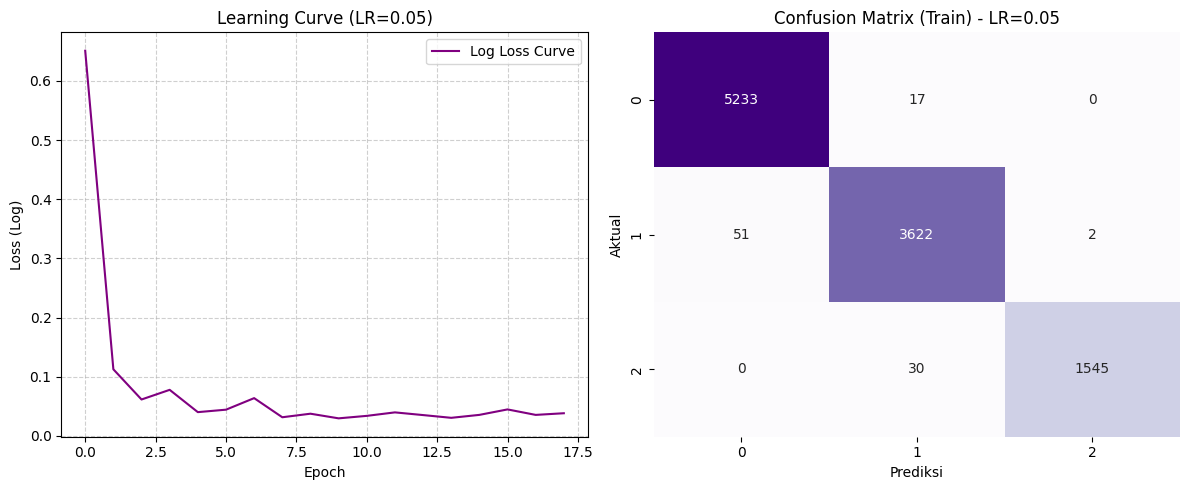


📊 HASIL AKHIR (LR=0.05):
1. Epoch Terakhir  : 18
2. Train Loss (MSE): 0.00952
3. Train Acc       : 0.9905
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5250
           1       0.99      0.99      0.99      3675
           2       1.00      0.98      0.99      1575

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [8]:
LR = list_lr[3]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 5
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.009` (Index List: [4])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.009
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.97592547
Validation score: 0.584762
Iteration 2, loss = 0.43667935
Validation score: 0.970476
Iteration 3, loss = 0.10898400
Validation score: 0.986667
Iteration 4, loss = 0.05636720
Validation score: 0.991429
Iteration 5, loss = 0.04449956
Validation score: 0.975238
Iteration 6, loss = 0.03598221
Validation score: 0.993333
Iteration 7, loss = 0.03717992
Validation score: 0.989524
Iteration 8, loss = 0.03362105
Validation score: 0.986667
Iteration 9, loss = 0.02768710
Validation score: 0.988571
Iteration 10, loss = 0.02307787
Validation score: 0.987619
Iteration 11, loss = 0.02345990
Validation score: 0.990476
Iteration 12, loss = 0.02376750
Validation score: 0.991429
Iteration 13, loss = 0.02939511
Validation score: 0.989524
Iteration 14, loss = 0.02955853
Validation score: 0.993333
Iteratio

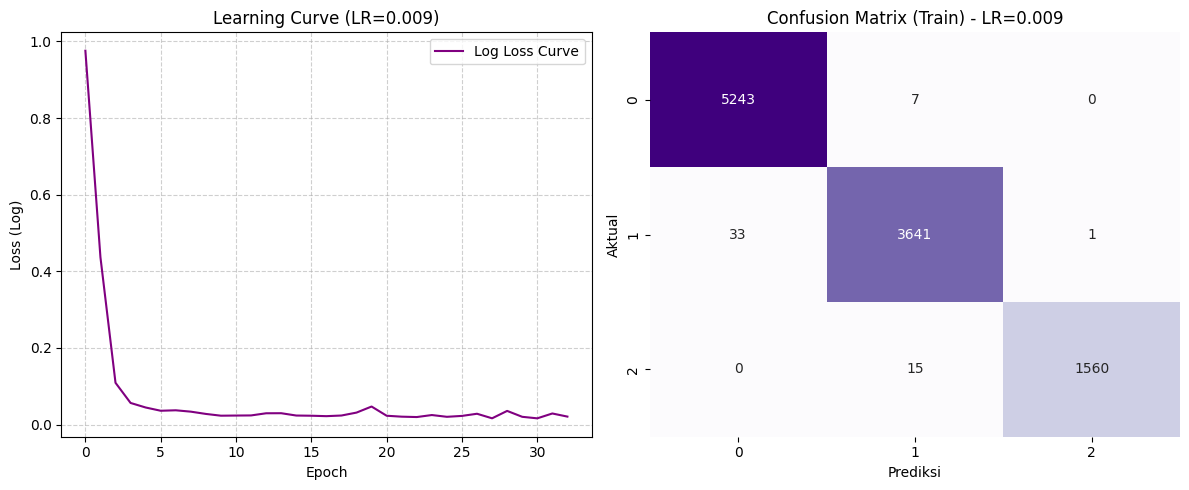


📊 HASIL AKHIR (LR=0.009):
1. Epoch Terakhir  : 33
2. Train Loss (MSE): 0.00533
3. Train Acc       : 0.9947
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5250
           1       0.99      0.99      0.99      3675
           2       1.00      0.99      0.99      1575

    accuracy                           0.99     10500
   macro avg       1.00      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [9]:
LR = list_lr[4]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 6
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.2` (Index List: [5])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.2
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 1.12431786
Validation score: 0.509524
Iteration 2, loss = 1.01780123
Validation score: 0.509524
Iteration 3, loss = 1.01471105
Validation score: 0.330476
Iteration 4, loss = 1.01474809
Validation score: 0.509524
Iteration 5, loss = 1.01205324
Validation score: 0.509524
Iteration 6, loss = 1.01596907
Validation score: 0.509524
Iteration 7, loss = 1.01687573
Validation score: 0.509524
Iteration 8, loss = 1.02848913
Validation score: 0.509524
Iteration 9, loss = 1.02709355
Validation score: 0.509524
Iteration 10, loss = 1.01789815
Validation score: 0.509524
Iteration 11, loss = 1.01584228
Validation score: 0.509524
Iteration 12, loss = 1.01900485
Validation score: 0.509524
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


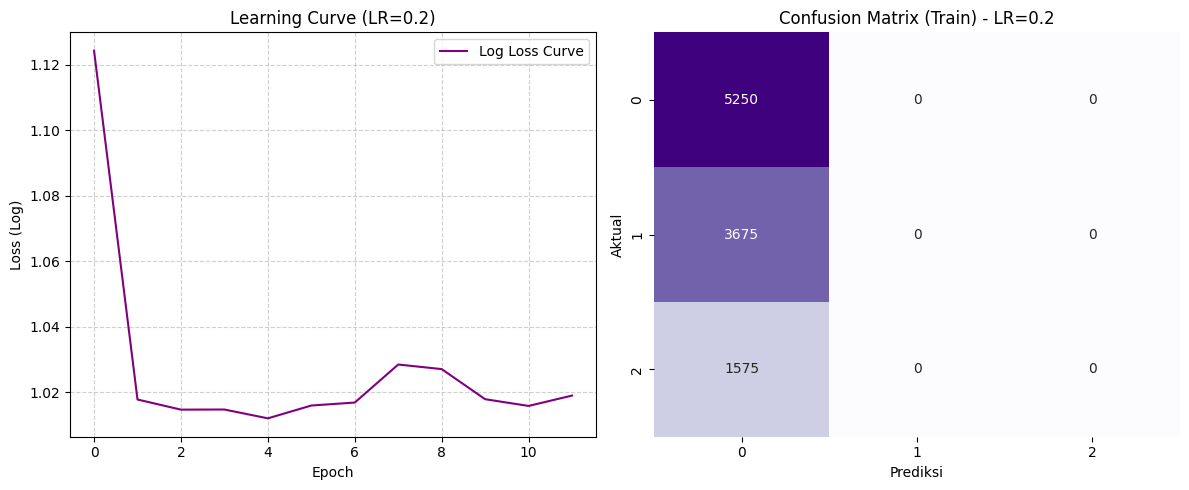


📊 HASIL AKHIR (LR=0.2):
1. Epoch Terakhir  : 12
2. Train Loss (MSE): 0.95000
3. Train Acc       : 0.5000
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5250
           1       0.00      0.00      0.00      3675
           2       0.00      0.00      0.00      1575

    accuracy                           0.50     10500
   macro avg       0.17      0.33      0.22     10500
weighted avg       0.25      0.50      0.33     10500



In [11]:
LR = list_lr[5]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 7
### **Konfigurasi 3 (Split 70-% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.6` (Index List: [6])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.6
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 1.77386893
Validation score: 0.509524
Iteration 2, loss = 1.02867215
Validation score: 0.509524
Iteration 3, loss = 1.02808695
Validation score: 0.509524
Iteration 4, loss = 1.04734974
Validation score: 0.509524
Iteration 5, loss = 1.05563796
Validation score: 0.330476
Iteration 6, loss = 1.03584982
Validation score: 0.330476
Iteration 7, loss = 1.04721245
Validation score: 0.330476
Iteration 8, loss = 1.07382974
Validation score: 0.509524
Iteration 9, loss = 1.02463779
Validation score: 0.509524
Iteration 10, loss = 1.09775740
Validation score: 0.330476
Iteration 11, loss = 1.05565713
Validation score: 0.509524
Iteration 12, loss = 1.04905247
Validation score: 0.509524
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


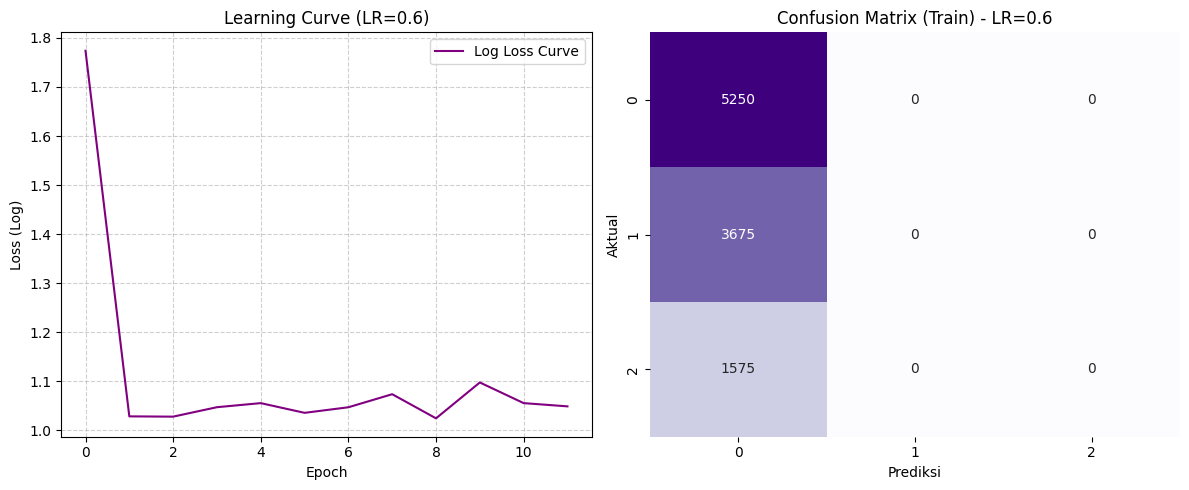


📊 HASIL AKHIR (LR=0.6):
1. Epoch Terakhir  : 12
2. Train Loss (MSE): 0.95000
3. Train Acc       : 0.5000
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5250
           1       0.00      0.00      0.00      3675
           2       0.00      0.00      0.00      1575

    accuracy                           0.50     10500
   macro avg       0.17      0.33      0.22     10500
weighted avg       0.25      0.50      0.33     10500



In [12]:
LR = list_lr[6]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 8
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.012` (Index List: [7])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.012
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.93951760
Validation score: 0.688571
Iteration 2, loss = 0.31189093
Validation score: 0.987619
Iteration 3, loss = 0.06991233
Validation score: 0.989524
Iteration 4, loss = 0.04286930
Validation score: 0.986667
Iteration 5, loss = 0.04112966
Validation score: 0.964762
Iteration 6, loss = 0.03330688
Validation score: 0.993333
Iteration 7, loss = 0.03523247
Validation score: 0.988571
Iteration 8, loss = 0.03324783
Validation score: 0.990476
Iteration 9, loss = 0.02587011
Validation score: 0.985714
Iteration 10, loss = 0.02090188
Validation score: 0.990476
Iteration 11, loss = 0.02386965
Validation score: 0.985714
Iteration 12, loss = 0.02694741
Validation score: 0.989524
Iteration 13, loss = 0.03133326
Validation score: 0.987619
Iteration 14, loss = 0.02749940
Validation score: 0.990476
Iteratio

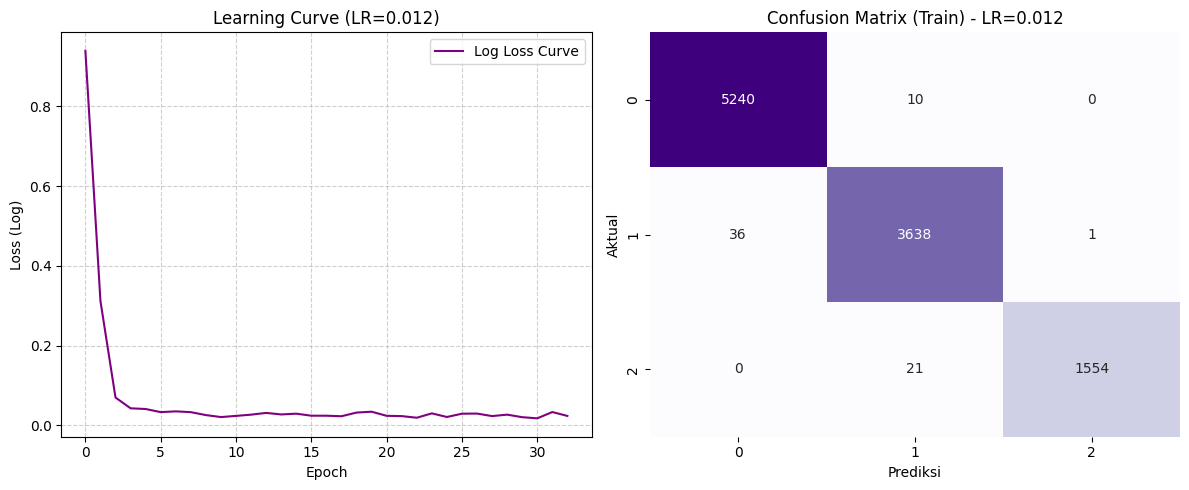


📊 HASIL AKHIR (LR=0.012):
1. Epoch Terakhir  : 33
2. Train Loss (MSE): 0.00648
3. Train Acc       : 0.9935
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5250
           1       0.99      0.99      0.99      3675
           2       1.00      0.99      0.99      1575

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [13]:
LR = list_lr[7]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred))

# 🧪 Eksperimen No. 9
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.01` (Index List: [8])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.01
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.96482256
Validation score: 0.628571
Iteration 2, loss = 0.38684390
Validation score: 0.981905
Iteration 3, loss = 0.09339446
Validation score: 0.986667
Iteration 4, loss = 0.05159300
Validation score: 0.991429
Iteration 5, loss = 0.04241195
Validation score: 0.970476
Iteration 6, loss = 0.03456013
Validation score: 0.992381
Iteration 7, loss = 0.03667159
Validation score: 0.987619
Iteration 8, loss = 0.03415781
Validation score: 0.988571
Iteration 9, loss = 0.02702007
Validation score: 0.987619
Iteration 10, loss = 0.02211781
Validation score: 0.989524
Iteration 11, loss = 0.02342574
Validation score: 0.988571
Iteration 12, loss = 0.02450805
Validation score: 0.992381
Iteration 13, loss = 0.03043298
Validation score: 0.988571
Iteration 14, loss = 0.03017885
Validation score: 0.993333
Iteration

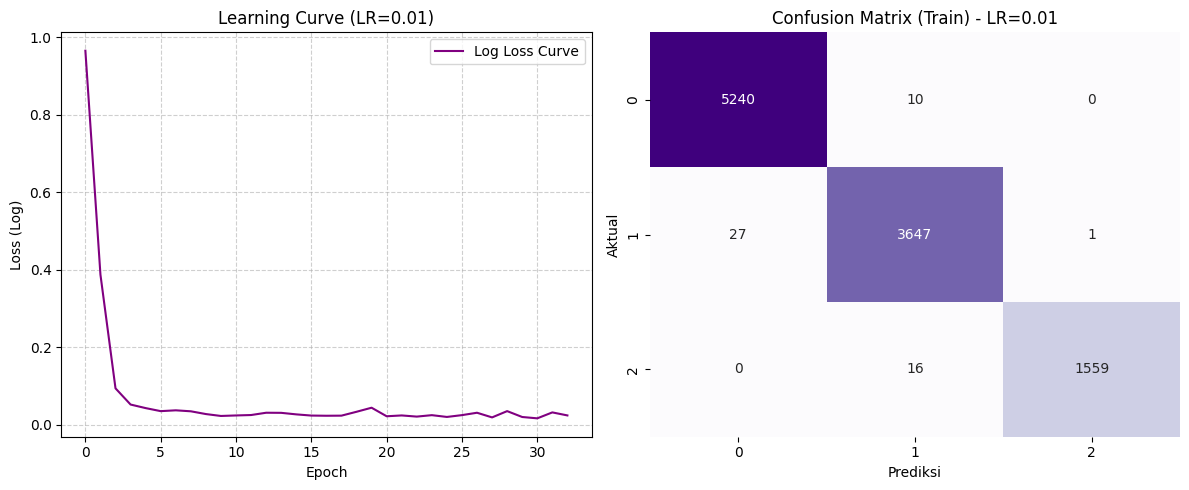


📊 HASIL AKHIR (LR=0.01):
1. Epoch Terakhir  : 33
2. Train Loss (MSE): 0.00514
3. Train Acc       : 0.9949
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5250
           1       0.99      0.99      0.99      3675
           2       1.00      0.99      0.99      1575

    accuracy                           0.99     10500
   macro avg       1.00      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [14]:
LR = list_lr[8]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 10
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.015` (Index List: [9])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.015
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.89798596
Validation score: 0.740000
Iteration 2, loss = 0.24102272
Validation score: 0.985714
Iteration 3, loss = 0.06016226
Validation score: 0.987619
Iteration 4, loss = 0.04144961
Validation score: 0.985714
Iteration 5, loss = 0.04112649
Validation score: 0.963810
Iteration 6, loss = 0.03299520
Validation score: 0.991429
Iteration 7, loss = 0.03750487
Validation score: 0.985714
Iteration 8, loss = 0.03304078
Validation score: 0.987619
Iteration 9, loss = 0.02758005
Validation score: 0.982857
Iteration 10, loss = 0.02213254
Validation score: 0.990476
Iteration 11, loss = 0.02463586
Validation score: 0.983810
Iteration 12, loss = 0.03160051
Validation score: 0.985714
Iteration 13, loss = 0.03394598
Validation score: 0.984762
Iteration 14, loss = 0.02730095
Validation score: 0.992381
Iteratio

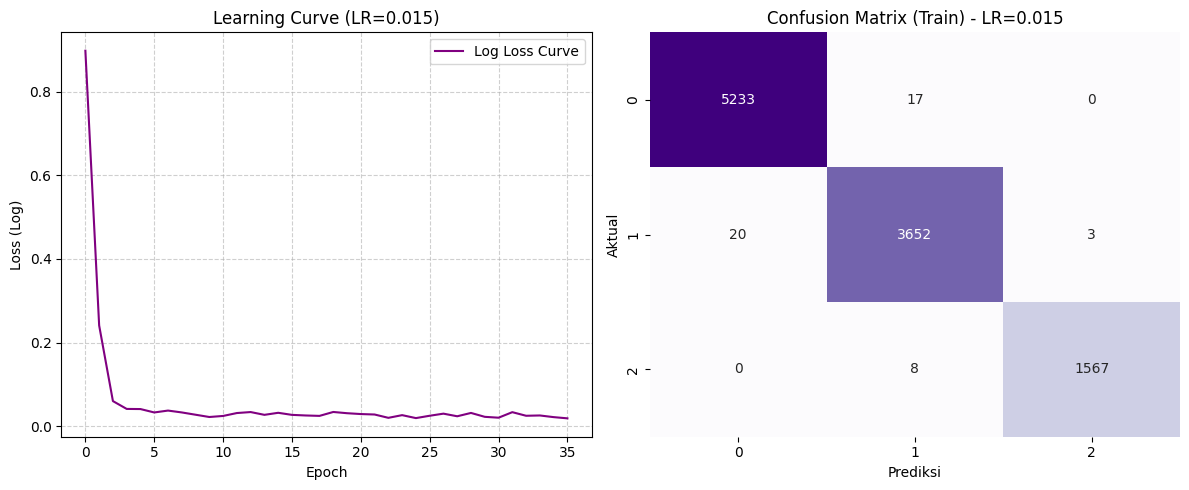


📊 HASIL AKHIR (LR=0.015):
1. Epoch Terakhir  : 36
2. Train Loss (MSE): 0.00457
3. Train Acc       : 0.9954
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5250
           1       0.99      0.99      0.99      3675
           2       1.00      0.99      1.00      1575

    accuracy                           1.00     10500
   macro avg       1.00      1.00      1.00     10500
weighted avg       1.00      1.00      1.00     10500



In [15]:
LR = list_lr[9]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 11
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.018` (Index List: [10])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.018
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.85783210
Validation score: 0.748571
Iteration 2, loss = 0.19906529
Validation score: 0.970476
Iteration 3, loss = 0.05313018
Validation score: 0.987619
Iteration 4, loss = 0.04211827
Validation score: 0.983810
Iteration 5, loss = 0.03812936
Validation score: 0.968571
Iteration 6, loss = 0.03076416
Validation score: 0.989524
Iteration 7, loss = 0.04155282
Validation score: 0.980952
Iteration 8, loss = 0.03687873
Validation score: 0.983810
Iteration 9, loss = 0.03278193
Validation score: 0.984762
Iteration 10, loss = 0.02126929
Validation score: 0.993333
Iteration 11, loss = 0.02681370
Validation score: 0.988571
Iteration 12, loss = 0.03597962
Validation score: 0.983810
Iteration 13, loss = 0.03327629
Validation score: 0.984762
Iteration 14, loss = 0.03393306
Validation score: 0.990476
Iteratio

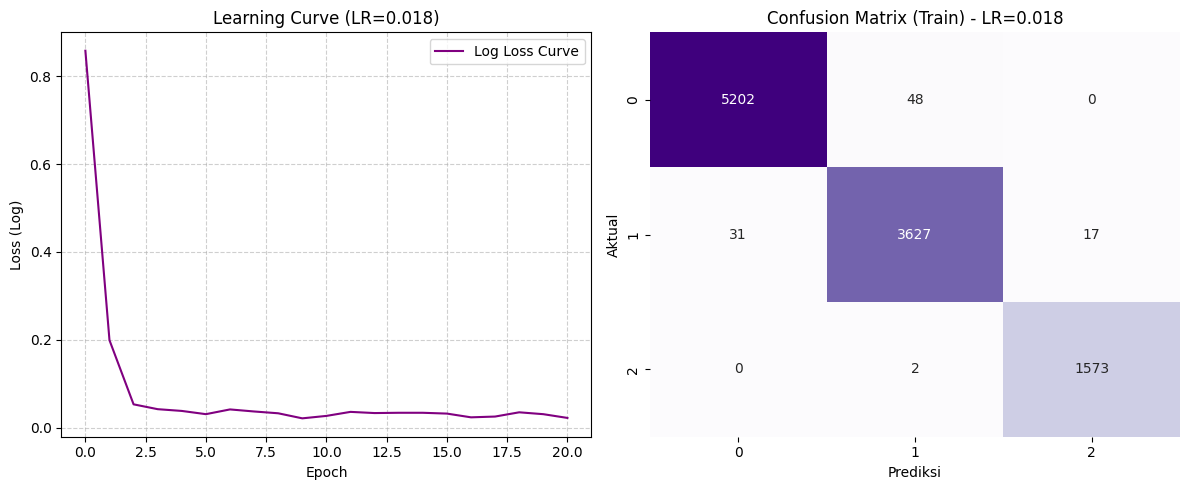


📊 HASIL AKHIR (LR=0.018):
1. Epoch Terakhir  : 21
2. Train Loss (MSE): 0.00933
3. Train Acc       : 0.9907
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5250
           1       0.99      0.99      0.99      3675
           2       0.99      1.00      0.99      1575

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [16]:
LR = list_lr[10]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))

# 🧪 Eksperimen No. 12
### **Konfigurasi 3 (Split 70% Train : 30% Test)**

**Parameter Utama:**
* **Learning Rate:** `0.0111` (Index List: [11])
* **Arsitektur:** (32, 64, 16)
* **Epoch Max:** 375

🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: 0.0111
Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52
------------------------------------------------------------
Iteration 1, loss = 0.95129960
Validation score: 0.667619
Iteration 2, loss = 0.34264731
Validation score: 0.984762
Iteration 3, loss = 0.08137740
Validation score: 0.991429
Iteration 4, loss = 0.04684136
Validation score: 0.989524
Iteration 5, loss = 0.04157727
Validation score: 0.964762
Iteration 6, loss = 0.03466412
Validation score: 0.992381
Iteration 7, loss = 0.03635965
Validation score: 0.984762
Iteration 8, loss = 0.03523483
Validation score: 0.987619
Iteration 9, loss = 0.02681064
Validation score: 0.987619
Iteration 10, loss = 0.02145297
Validation score: 0.989524
Iteration 11, loss = 0.02397326
Validation score: 0.988571
Iteration 12, loss = 0.02544528
Validation score: 0.991429
Iteration 13, loss = 0.03170302
Validation score: 0.989524
Iteration 14, loss = 0.03010801
Validation score: 0.991429
Iterati

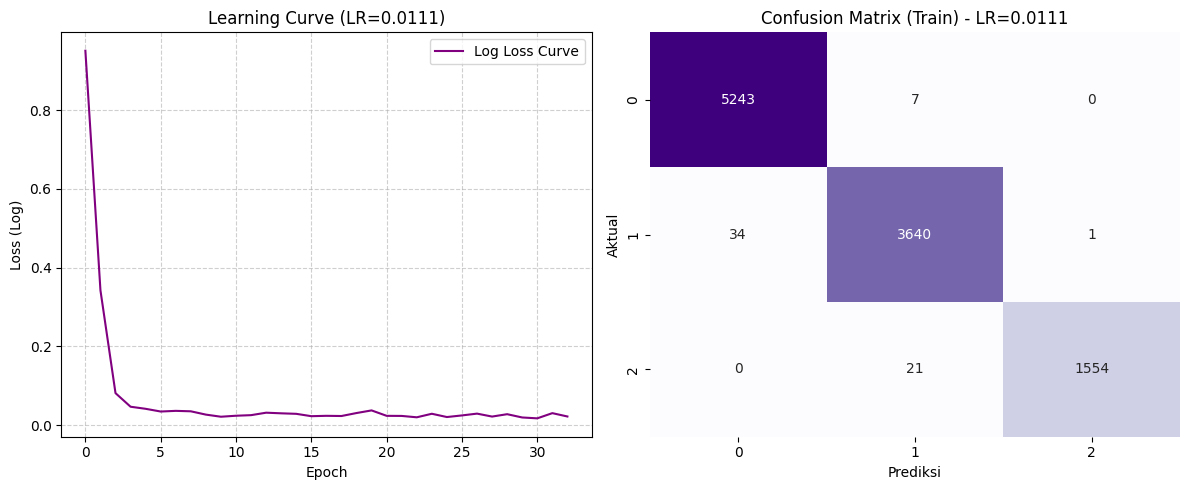


📊 HASIL AKHIR (LR=0.0111):
1. Epoch Terakhir  : 33
2. Train Loss (MSE): 0.00600
3. Train Acc       : 0.9940
----------------------------------------
DETAIL PERFORMA (Recall, F1, Support):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5250
           1       0.99      0.99      0.99      3675
           2       1.00      0.99      0.99      1575

    accuracy                           0.99     10500
   macro avg       1.00      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [17]:
LR = list_lr[11]

print(f"🚀 MULAI EKSPERIMEN DENGAN LEARNING RATE: {LR}")
print("Arsitektur: (32, 64, 16) | Activation: Logistic | Random State: 52")
print("-" * 60)


mlp = MLPClassifier(
    hidden_layer_sizes=(32, 64, 16),  # Arsitektur Khusus
    activation='logistic',            # Activation: Logistic
    solver='adam',                    # Solver: Adam
    learning_rate_init=LR,            # Learning Rate (Variabel)
    momentum=0.8,                     # Momentum (Dicatat meski Adam otomatis)
    batch_size='auto',
    validation_fraction=0.1,          # Validation Fraction
    max_iter=375,                     # Epoch max (bisa disesuaikan)
    random_state=52,                  # Random State: 52
    early_stopping=True,
    verbose=True                      # Wajib True agar muncul log per epoch
)

# 2. Training
mlp.fit(X_train_scaled, y_train)

# 3. Evaluasi & Perhitungan Metrics
y_train_pred = mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

# --- VISUALISASI ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, color='purple', label='Log Loss Curve')
plt.title(f'Learning Curve (LR={LR})')
plt.xlabel('Epoch')
plt.ylabel('Loss (Log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix (Train) - LR={LR}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

plt.tight_layout()
plt.show()

# --- LAPORAN DETAIL ---
print(f"\n📊 HASIL AKHIR (LR={LR}):")
print(f"1. Epoch Terakhir  : {mlp.n_iter_}")
print(f"2. Train Loss (MSE): {mse_train:.5f}")
print(f"3. Train Acc       : {acc_train:.4f}")
print("-" * 40)
print("DETAIL PERFORMA (Recall, F1, Support):")
print(classification_report(y_train, y_train_pred, zero_division=0))